## Задание 1 

Сформировать модель ИНС для регрессии. 
	1.1. Провести эксперименты по аппроксимации нелинейной функции одного аргумента y = sin(x) с разным количеством слоев и нейронов.
	1.2. Провести эксперименты по аппроксимации функции нескольких аргументов y = a1*x1 + a2*x2 + a3*x3*x4 с разным количеством слоев и нейронов.

## 1.1

32/32 [==============================] - 0s 624us/step


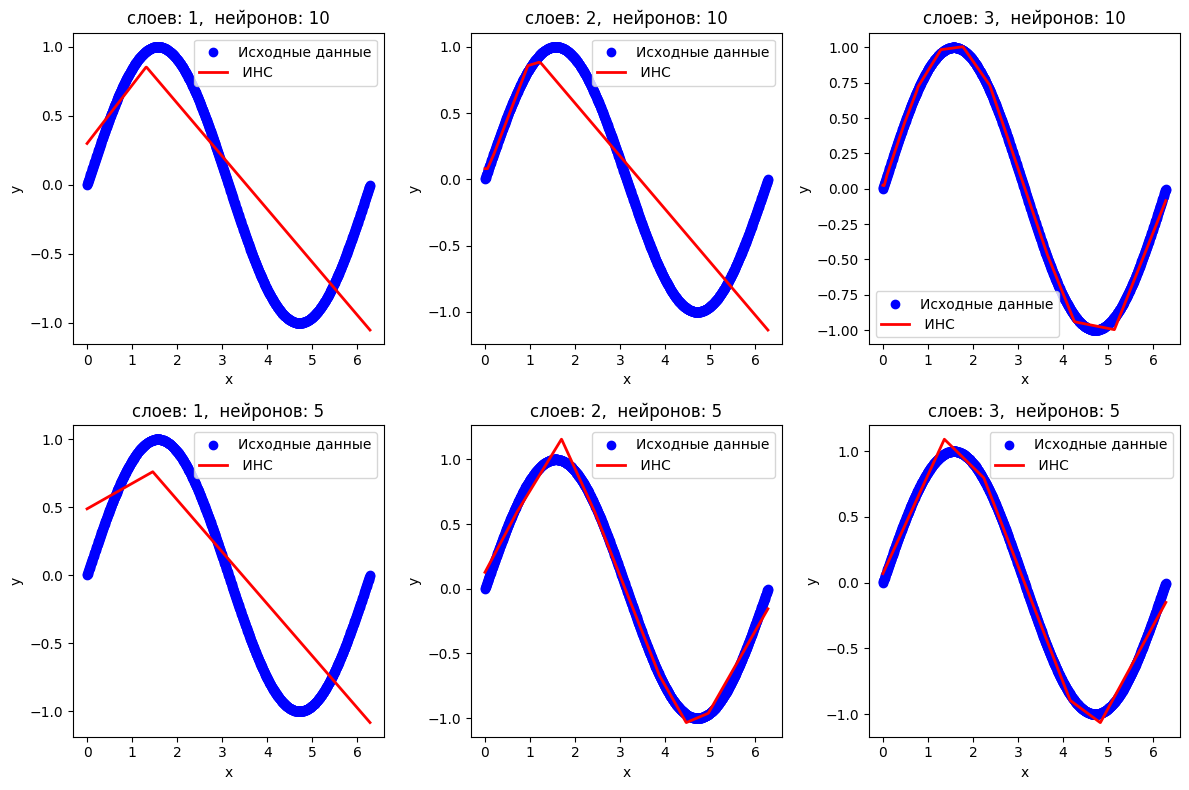

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)

configs = [(1, 10), (2, 10), (3, 10), (1, 5), (2, 5), (3, 5)]   # (слоев, нейронов)

# Проведение экспериментов
plt.figure(figsize=(12, 8))
for i, (num_layers, num_neurons) in enumerate(configs):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=1, activation='relu'))
    for _ in range(num_layers - 1):
        model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(1))# 1 выходной нейрон
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x, y, epochs=100,  verbose=0)
    predictions = model.predict(x)
    
    plt.subplot(2, 3, i + 1)
    plt.scatter(x, y, color='blue', label='Исходные данные')
    plt.plot(x, predictions, color='red', linewidth=2, label=f' ИНС')
    plt.title(f'слоев: {num_layers},  нейронов: {num_neurons}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()


### 1.2

In [16]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(0)
x1 = np.random.rand(1000)
x2 = np.random.rand(1000)
x3 = np.random.rand(1000)
x4 = np.random.rand(1000)
y = 2*x1 + 3*x2 + 4*x3*x4

configs = [(1, 10), (2, 10), (3, 10), (1, 5), (2, 5), (3, 5)]  # (слоев, нейронов)

results = []

test_data = np.array([[0.6, 0.7, 0.8, 0.9]]) # тестовые данные для проверки моделей
real_value = 2*0.6 + 3*0.7 + 4*0.8*0.9
for num_layers, num_neurons in configs:
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=4, activation='relu'))
    for _ in range(num_layers - 1):
        model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(1)) # 1 выходной нейрон
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(np.column_stack((x1, x2, x3, x4)), y, epochs=100, verbose=0)
    predicted_value = model.predict(test_data)[0][0]
    results.append({
        'Количество слоев': num_layers,
        'Количество нейронов': num_neurons,
        'Предсказанное значение': predicted_value,
        'Фактическое значение': real_value
    })

# Создание DataFrame и вывод в таблицу
df = pd.DataFrame(results)
df


1/1 [==============================] - 0s 24ms/step


,Количество слоев,Количество нейронов,Предсказанное значение,Фактическое значение
0,1,10,6.036991,6.18
1,2,10,6.249536,6.18
2,3,10,6.212669,6.18
3,1,5,6.125473,6.18
4,2,5,5.897716,6.18
5,3,5,6.129004,6.18


## Задание 2

 2.1 Выбрать набор данных для классификации.
 2.2 Провести нормализацию и удаление пропусков в наборе при необходимости.
 2.3 Провести эксперименты с разным количеством слоев, нейронов и разными активационными функциями модели ИНС.
 2.4 Сопоставьте результаты, полученные с помощью ИНС, с результатами, которые получены другими алгоритмами машинного обучения (Random Forest, деревья решения, kNN).


### 2.1

Возьмем Iris

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.2
- В данном случае нормализация не требуется, так как признаки в наборе данных Iris уже имеют схожие диапазоны значений.
- Удаление пропусков также не требуется, так как набор данных Iris полный и не содержит пропущенных значений.

### 2.3

In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

configs = [
    (1, 10, 'relu'), 
    (2, 10, 'relu'), 
    (3, 10, 'relu'), 
    (1, 5, 'relu'), 
    (2, 5, 'relu'), 
    (3, 5, 'relu'), 
    (1, 10, 'sigmoid'), 
    (2, 10, 'sigmoid'), 
    (3, 10, 'sigmoid'), 
    (1, 5, 'sigmoid'), 
    (2, 5, 'sigmoid'), 
    (3, 5, 'sigmoid')
] # (слоев, нейронов, активационная функция)

results = []
for num_layers, num_neurons, activation_function in configs:
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=4, activation=activation_function)) # 4 входных признака
    for _ in range(num_layers - 1):
        model.add(Dense(num_neurons, activation=activation_function))
    model.add(Dense(3, activation='softmax')) # 3 выходных класса
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, verbose=0)
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    results.append({
        'Количество слоев': num_layers,
        'Количество нейронов': num_neurons,
        'Активационная функция': activation_function,
        'Точность на тестовых данных': accuracy
    })

# Создание DataFrame и вывод в таблицу
df = pd.DataFrame(results)
df


,Количество слоев,Количество нейронов,Активационная функция,Точность на тестовых данных
0,1,10,relu,0.924528
1,2,10,relu,0.981132
2,3,10,relu,1.000000
3,1,5,relu,0.660377
4,2,5,relu,0.830189
5,3,5,relu,0.981132
6,1,10,sigmoid,0.981132
7,2,10,sigmoid,0.981132
8,3,10,sigmoid,0.811321
9,1,5,sigmoid,0.905660


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
predictions_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
predictions_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, predictions_dt)

# kNN
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
predictions_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, predictions_knn)

# Точность моделей
print(f'Точность Random Forest: {accuracy_rf:.2f}')
print(f'Точность Decision Tree: {accuracy_dt:.2f}')
print(f'Точность kNN: {accuracy_knn:.2f}')


Точность Random Forest: 0.98
Точность Decision Tree: 0.98
Точность kNN: 0.98
